In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Loading data
states = pd.read_csv('C:/Users/HP/Desktop/State-Complaint-Dashboard/Data/states_full.csv')
complaints = pd.read_csv('C:/Users/HP/Desktop/State-Complaint-Dashboard/Data/complaints_full.csv')
customers = pd.read_csv('C:/Users/HP/Desktop/State-Complaint-Dashboard/Data/customers_full.csv')
categories = pd.read_csv('C:/Users/HP/Desktop/State-Complaint-Dashboard/Data/categories_full.csv')

states.head(), complaints.head(), customers.head(), categories.head()

(   state_id         state_name      region
 0         1     Andhra Pradesh       South
 1         2  Arunachal Pradesh  North-East
 2         3              Assam  North-East
 3         4              Bihar        East
 4         5       Chhattisgarh     Central,
    complaint_id  customer_id  state_id  category_id complaint_date  \
 0             1            1         1            1     2023-01-15   
 1             2            2         2            2     2023-02-10   
 2             3            3         3            3     2023-03-05   
 3             4            4         4            4     2023-04-12   
 4             5            5         5            5     2023-05-20   
 
         status resolution_date                        description  \
 0     Resolved      2023-01-20           Theft reported in Mumbai   
 1         Open             NaN    Water supply issue in Bengaluru   
 2  In Progress             NaN                 Robbery in Kolkata   
 3     Resolved      2023-0

In [7]:
#inspect dfs
dfs = {'Customers' : customers, 'Complaints' : complaints, 'States': states, 'Categories' : categories }
for name, df in dfs.items():
    print(f"---{name}---")
    print(df.info())
    print(df.head(), '\n')

---Customers---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    2006 non-null   int64 
 1   customer_name  2006 non-null   object
 2   gender         2006 non-null   object
 3   age            2006 non-null   int64 
 4   state_id       2006 non-null   int64 
 5   city           2006 non-null   object
 6   phone_number   2006 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 109.8+ KB
None
   customer_id customer_name  gender  age  state_id       city  phone_number
0            1    Rohan Shah    Male   30         1     Mumbai    9876543210
1            2  Priya Sharma  Female   25         2  Bengaluru    9876543211
2            3    Amit Verma    Male   40         3    Kolkata    9876543212
3            4    Neha Gupta  Female   35         4    Lucknow    9876543213
4            5   Rahul Singh    Male   28        

In [8]:
# check for nulls and unique values
for name, df in dfs.items():
    print(f"Null values in {name}:\n{df.isnull().sum()}\n")
    print(f"Unique values in {name}:\n{df.nunique()}\n")

Null values in Customers:
customer_id      0
customer_name    0
gender           0
age              0
state_id         0
city             0
phone_number     0
dtype: int64

Unique values in Customers:
customer_id      2006
customer_name    1006
gender              3
age                58
state_id           34
city               10
phone_number     2006
dtype: int64

Null values in Complaints:
complaint_id          0
customer_id           0
state_id              0
category_id           0
complaint_date        0
status                0
resolution_date    3961
description           0
priority_level        0
dtype: int64

Unique values in Complaints:
complaint_id       6006
customer_id        1758
state_id             34
category_id          12
complaint_date     1085
status                3
resolution_date     924
description        3006
priority_level        3
dtype: int64

Null values in States:
state_id      0
state_name    0
region        0
dtype: int64

Unique values in States:
state

5 EDA Questions

In [ ]:
# 1. Total complaints per state

# Merge complaints with states to add state names
complaints_merged = complaints.merge(states, on='state_id', how='left')

# Now calculate complaints per state
complaints_per_state = complaints_merged['state_name'].value_counts().reset_index()
complaints_per_state.columns = ['state', 'total_complaints']

complaints_per_state

,state,total_complaints
0,Chhattisgarh,608
1,Goa,606
2,Assam,592
3,Andhra Pradesh,590
4,Bihar,576
5,Arunachal Pradesh,568
6,West Bengal,110
7,Uttar Pradesh,105
8,Madhya Pradesh,104
9,Telangana,99


In [ ]:
# 2. Most common complaint category
complaints_merged_category = complaints.merge(categories, on='category_id', how='left')

complaints_per_category = complaints_merged_category['category_name'].value_counts().reset_index()
complaints_per_category.columns = ['category', 'total_complaints']
complaints_per_category

,category,total_complaints
0,Fraud,871
1,Assault,867
2,Robbery,866
3,Domestic Violence,838
4,Theft,836
5,Education,262
6,Healthcare,255
7,Water Supply,253
8,Public Transport,247
9,Road Maintenance,243


In [ ]:
# 3. Resolution rate & Average resolution time

# Resolution Rate
resolution_rate = complaints_merged['status'].value_counts(normalize=True) * 100
resolution_rate

# Average Resolution Time (for resolved cases)
resolved_cases = complaints_merged[complaints_merged['status'] == 'Resolved'].copy()

resolved_cases.loc[:, 'resolution_time'] = (
    pd.to_datetime(resolved_cases['resolution_date']) - 
    pd.to_datetime(resolved_cases['complaint_date'])
).dt.days

avg_resolution_time = resolved_cases['resolution_time'].mean()
print(f"Average resolution time: {avg_resolution_time:.2f} days")


Average resolution time: 5.03 days


In [25]:
# 4. Top customers with most complaints

top_customers = complaints['customer_id'].value_counts().reset_index().head(10)
top_customers.columns = ['customer_id', 'total_complaints']
top_customers


,customer_id,total_complaints
0,3082,15
1,3194,12
2,3948,12
3,3163,12
4,3783,11
5,3119,11
6,3705,11
7,3066,11
8,4027,10
9,3763,10


Plots

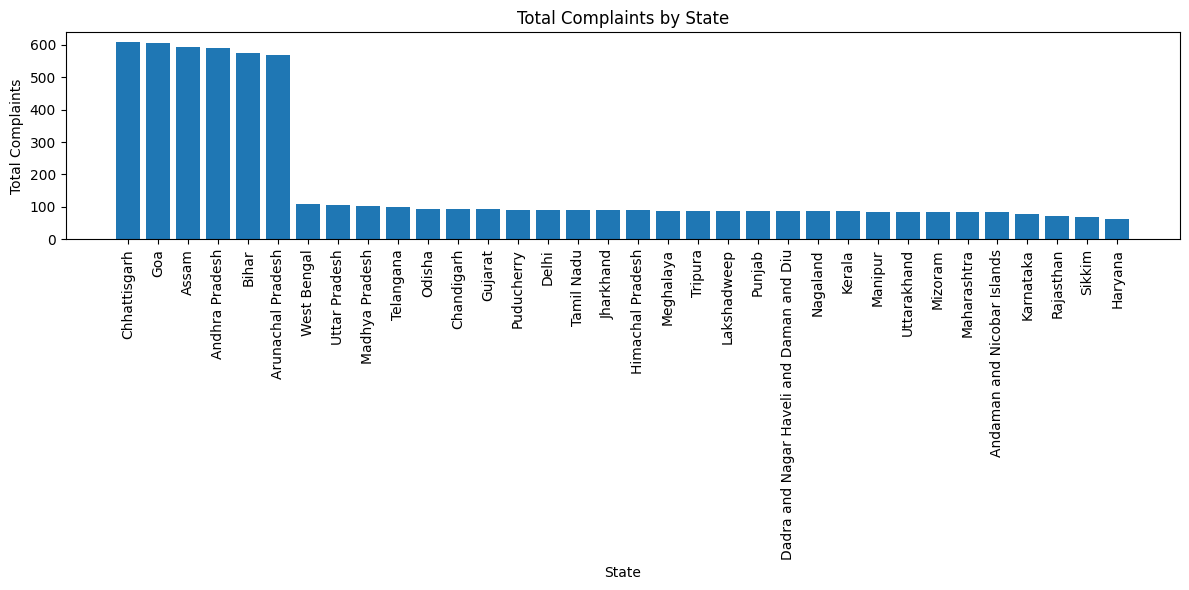

In [27]:
# 1. Total complaints per state

plt.figure(figsize=(12, 6))
plt.bar(complaints_per_state['state'], complaints_per_state['total_complaints'])
plt.xlabel('State')
plt.ylabel('Total Complaints')
plt.title('Total Complaints by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

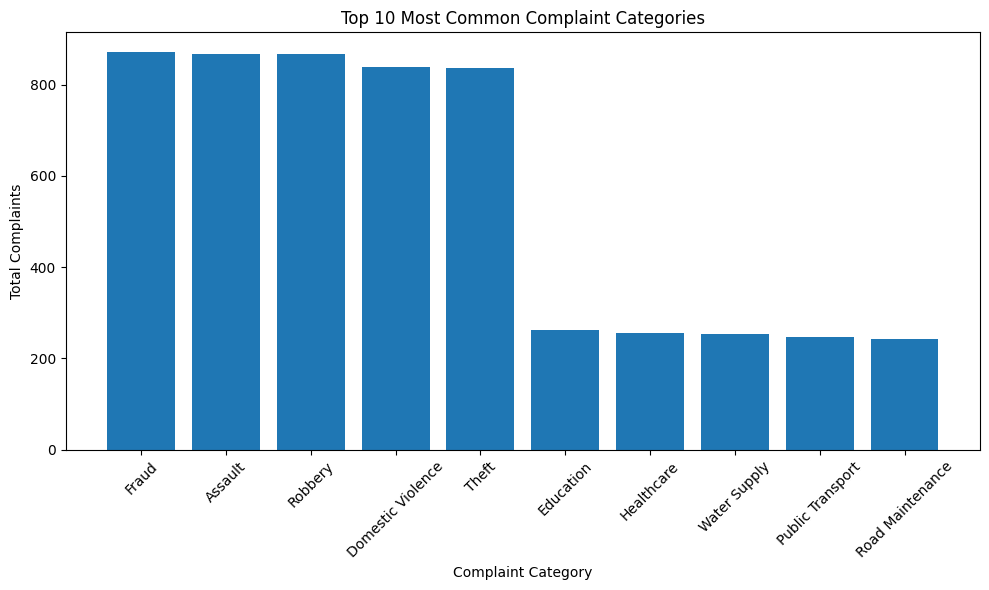

In [28]:
# 2. Most common complaint categories

top_categories = complaints_per_category.head(10)  # Top 10

plt.figure(figsize=(10, 6))
plt.bar(top_categories['category'], top_categories['total_complaints'])
plt.xlabel('Complaint Category')
plt.ylabel('Total Complaints')
plt.title('Top 10 Most Common Complaint Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

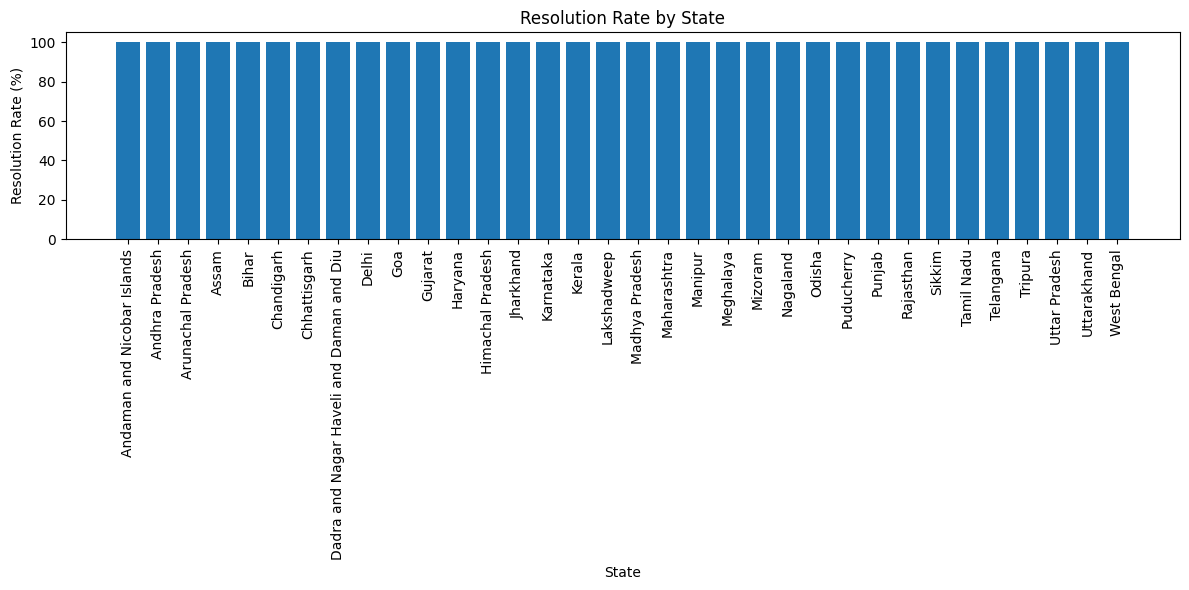

In [30]:
# 3. Resolution Rate per state

complaints_with_resolution = complaints_merged[
    complaints_merged['status'] == 'Resolved'
]
resolution_rate_per_state = complaints_with_resolution.groupby('state_name').agg(
    resolution_rate=('status', lambda x: (x == 'Resolved').mean() * 100)
).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(resolution_rate_per_state['state_name'], resolution_rate_per_state['resolution_rate'])
plt.xlabel('State')
plt.ylabel('Resolution Rate (%)')
plt.title('Resolution Rate by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
